In [13]:
import PyCC
import numpy as np
import matplotlib.pyplot as plt

def plot_pretty(dpi=150,fontsize=15):
    plt.rcParams['figure.dpi']= dpi
    plt.rc("savefig", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in')
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5)
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5)
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [2., 2.])
    plt.rc('legend',fontsize=5)
    plt.rcParams['figure.figsize'] = [5, 3]

In [2]:
r = 100
ray_length = r*2
p = 0.1
ray_steps = 500
ns = []
temp = 2048
for i in range(6):
    ns.append(temp)
    temp *= 2

do_eps = True

eps = [0] * len(ns)

if do_eps:
    vol = (4/3) * np.pi * r**3
    for idx,n in enumerate(ns):
        part_sep = (vol/n)**(1/3)
        eps[idx] = 0.1 * part_sep

name = "Plots/Histograms/Comparisons/Uniform/DOUBLE_ns=" + str(ns).replace(" ","").replace(",","_") + "_r="+str(r)+"_p=0,1_eps=" + str([round(i,2) for i in eps]).replace(",","_").replace(".",",").replace(" ","")
title = "Double Precision Uniform Distribution, \n" + r"$R=" + str(r) + r",\rho=" + str(p) + r"$"

In [3]:
data = {}
n_rays = 20
n_gens = 1

total_rays = n_rays * n_gens

data = {}

for idx,n in enumerate(ns):
    print(n)
    rays = []
    for vector in PyCC.random_vectors(n_rays):
        rays.append(PyCC.ray(vector,ray_length,ray_steps))
    count = 0
    data[n] = {}
    data[n]["double"] = np.zeros((total_rays,ray_steps),dtype=np.float64)
    data[n]["single"] = np.zeros((total_rays,ray_steps),dtype=np.float32)

    for i in range(n_gens):
        df = PyCC.Distributions.Uniform(r=r,n=n,p=p)

        for ray in rays:
            ray_out,stats = PyCC.evaluate(df,evaluate_at=ray,steps=0,precision="double",eval_only=True,eps=eps[idx])
            ray_phis = ray_out.loc[:,"phi"].to_numpy()

            ray_out2,stats = PyCC.evaluate(df,evaluate_at=ray,steps=0,precision="single",eval_only=True,eps=eps[idx])
            ray_phis2 = ray_out2.loc[:,"phi"].to_numpy().astype("f4")
    
            data[n]["double"][count] = ray_phis
            data[n]["single"][count] = ray_phis2

            count += 1

ray_analytics = PyCC.Analytic.Uniform(r=r,p=p,positions=rays[0])

2048
4096
8192
16384
32768
65536


In [14]:
plot_pretty()

[8.990047080630822e-14, 8.990047080630822e-14, 8.990047080630822e-14, 8.990047080630822e-14, 8.990047080630822e-14, 8.990047080630822e-14]


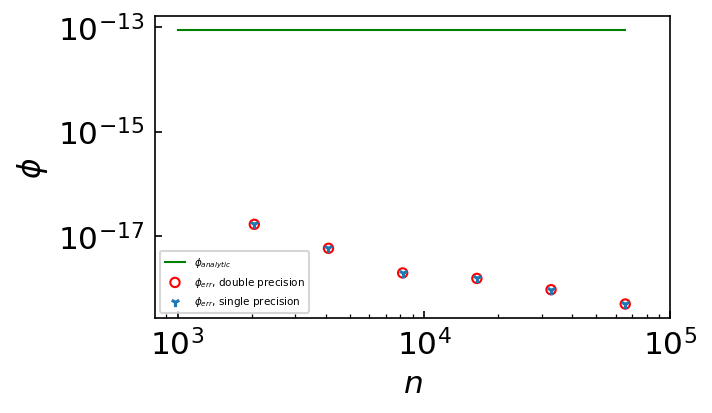

In [15]:
from_errors_double = []
from_errors_single = []
from_relaxations = []
for n in ns:
    from_error_double = data[n]["double"] - ray_analytics
    from_errors_double.append(np.mean(from_error_double**2))

    from_error_single = data[n]["single"] - ray_analytics
    from_errors_single.append(np.mean(from_error_single**2))

    from_relaxation = ray_analytics
    from_relaxations.append(np.mean(from_relaxation**2))

plt.plot([1000,ns[-1]],from_relaxations[:2],linewidth=1,label=r"$\phi_{analytic}$",color="g")

plt.scatter(ns,from_errors_double,label=r"$\phi_{err}$, double precision",s=20,zorder=0,facecolors='none', edgecolors='r')
plt.scatter(ns,from_errors_single,label=r"$\phi_{err}$, single precision",s=20,marker="1",zorder=1)

plt.yscale('log')
plt.xscale('log')
plt.ylabel(r"$\phi$")
plt.xlabel(r"$n$")
plt.xticks([1000,10000,100000])
plt.legend()
plt.tight_layout()
plt.show()

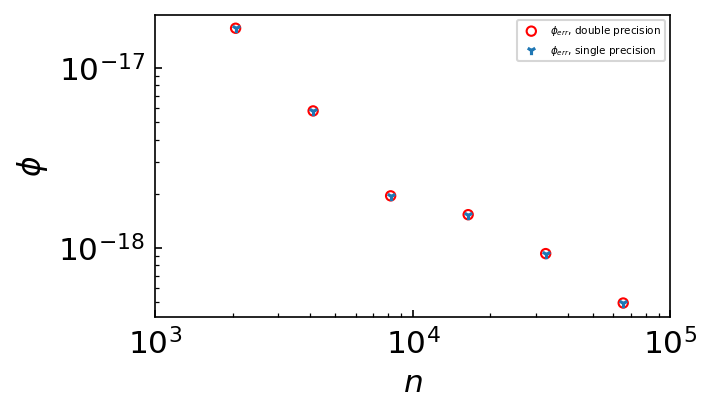

In [16]:
plt.scatter(ns,from_errors_double,label=r"$\phi_{err}$, double precision",s=20,zorder=0,facecolors='none', edgecolors='r')
plt.scatter(ns,from_errors_single,label=r"$\phi_{err}$, single precision",s=20,marker="1",zorder=1)

plt.yscale('log')
plt.xscale('log')
plt.ylabel(r"$\phi$")
plt.xlabel(r"$n$")
plt.xticks([1000,10000,100000])
plt.legend()
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[2048, 4096, 8192, 16384, 32768, 65536]
[ 2.63385872e-23 -2.12158054e-23 -2.09151784e-24 -1.15351200e-23
  2.55666876e-24 -4.84676539e-24]


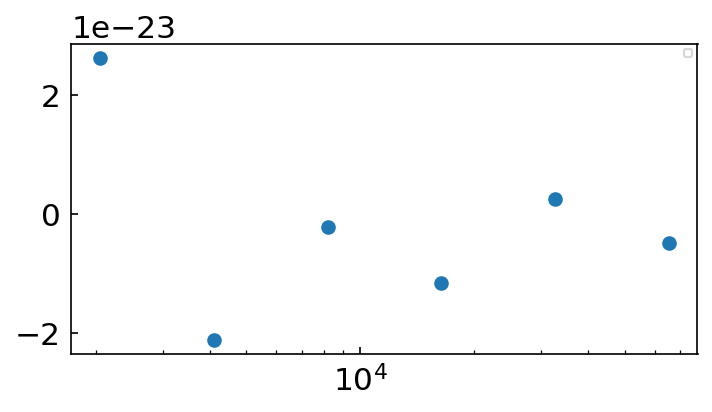

In [26]:
plt.scatter(ns,np.array(from_errors_double) - np.array(from_errors_single))
print(ns)
print(np.array(from_errors_double) - np.array(from_errors_single))
#plt.yscale('log')
plt.xscale('log')
#plt.ylabel(r"$\phi$")
#plt.xlabel(r"$n$")
#plt.xticks([1000,10000,100000])
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
numericals = []
doubles = []
singles = []
for n in ns:
    single_vs_double = data[n]["double"] - data[n]["single"]
    numerical_error = np.sum(single_vs_double,axis=1)
    from_error_double = data[n]["double"] - ray_analytics
    double_noise = np.sum(from_error_double,axis=1)
    from_error_single = data[n]["single"] - ray_analytics
    single_noise = np.sum(from_error_single,axis=1)

    numericals.append(np.mean(numerical_error))
    doubles.append(np.mean(double_noise))
    singles.append(np.mean(single_noise))

print(numericals)
print(doubles)
print(singles)
    
    

[3.482608575601517e-12, 3.5053281987307137e-12, 3.103061995370923e-12, 4.56771652596407e-12, 3.1219237231147054e-12, 3.2074322802469806e-12]
[8.376330572072469e-07, -5.401543430690098e-07, -6.33427069494255e-08, -2.2750417549765544e-07, 6.7481375316891e-08, -1.0440845694061786e-07]
[8.376295745986712e-07, -5.401578483972087e-07, -6.334581001142087e-08, -2.2750874321418138e-07, 6.747825339316786e-08, -1.0441166437289814e-07]
